In [143]:
import requests
import json
import csv
import pandas as pd

from matplotlib import pyplot as plt
import numpy as np

In [3]:
lat = "42.098701"
lon = "-75.912537"
genius = requests.get(f"https://api.weather.gov/points/{lat},{lon}")

json_file = genius.json()

forecast = json_file["properties"]["forecast"]
new_request = requests.get(forecast)

json = new_request.json()

new = json["properties"]["periods"]

csv_file = open("weather.csv", "w", newline="", encoding="utf-8")
csv_writer = csv.writer(csv_file)
csv_writer.writerow(["Name", "Temperature", "Detailed Forecast"])
 
for i in range(len(new)):
    
    name = (new[i]["name"])
    temperature = (new[i]["temperature"])
    detailedForecast = (new[i]["detailedForecast"])
    
    csv_writer.writerow([name,temperature,detailedForecast])
        
csv_file.close()

In [52]:
sheet = pd.read_csv("weather.csv")
sheet

,Name,Temperature,Detailed Forecast
0,Tonight,28,"Rain showers before 11pm. Mostly cloudy, with ..."
1,Saturday,41,A slight chance of snow showers after 4pm. Par...
2,Saturday Night,20,A slight chance of snow showers. Mostly cloudy...
3,Sunday,32,A slight chance of snow showers before 2pm. Mo...
4,Sunday Night,23,"Partly cloudy, with a low around 23. West wind..."
5,Monday,48,"Sunny, with a high near 48."
6,Monday Night,26,"Mostly clear, with a low around 26."
7,Tuesday,53,"Sunny, with a high near 53."
8,Tuesday Night,31,"Partly cloudy, with a low around 31."
9,Wednesday,55,A slight chance of rain showers after 2pm. Par...


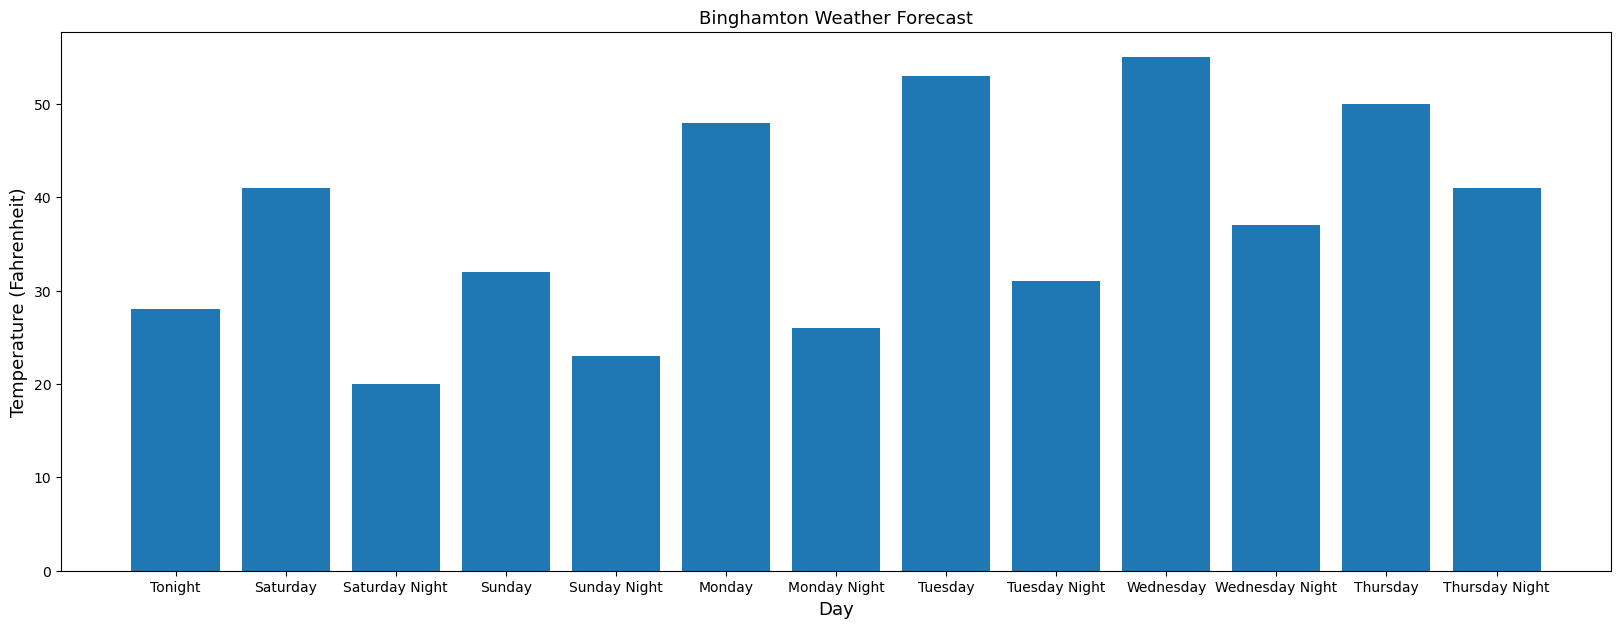

In [64]:
weather = pd.DataFrame(sheet)

name = weather["Name"]
temp = weather["Temperature"]

fig = plt.figure(figsize = (20, 7)) #Bonus: to space out the labels I just changed the width of the figure
plt.bar(name[0:13], temp[0:13])

plt.xlabel("Day", fontsize=13)
plt.ylabel("Temperature (Fahrenheit)", fontsize=13)
plt.title("Binghamton Weather Forecast", fontsize=13)


plt.show()

In [19]:
year = 2023
countryCode = "SV"

info = requests.get(f"https://date.nager.at/api/v3/CountryInfo/{countryCode}")
json = info.json()
json

#with this call, the api pulls up all the info of the country, which it determines using the country code that 
#is inputted; the info includes other names of the country, its region, and the info of the countries it borders

{'commonName': 'El Salvador',
 'officialName': 'Republic of El Salvador',
 'countryCode': 'SV',
 'region': 'Americas',
 'borders': [{'commonName': 'Guatemala',
   'officialName': 'Republic of Guatemala',
   'countryCode': 'GT',
   'region': 'Americas',
   'borders': None},
  {'commonName': 'Honduras',
   'officialName': 'Republic of Honduras',
   'countryCode': 'HN',
   'region': 'Americas',
   'borders': None}]}

In [20]:
allcountry = requests.get(f"https://date.nager.at/api/v3/AvailableCountries")
json1 = allcountry.json()
json1

#this call gets all the available countries, listing their name and their country code

[{'countryCode': 'AD', 'name': 'Andorra'},
 {'countryCode': 'AL', 'name': 'Albania'},
 {'countryCode': 'AR', 'name': 'Argentina'},
 {'countryCode': 'AT', 'name': 'Austria'},
 {'countryCode': 'AU', 'name': 'Australia'},
 {'countryCode': 'AX', 'name': 'Åland Islands'},
 {'countryCode': 'BA', 'name': 'Bosnia and Herzegovina'},
 {'countryCode': 'BB', 'name': 'Barbados'},
 {'countryCode': 'BE', 'name': 'Belgium'},
 {'countryCode': 'BG', 'name': 'Bulgaria'},
 {'countryCode': 'BJ', 'name': 'Benin'},
 {'countryCode': 'BO', 'name': 'Bolivia'},
 {'countryCode': 'BR', 'name': 'Brazil'},
 {'countryCode': 'BS', 'name': 'Bahamas'},
 {'countryCode': 'BW', 'name': 'Botswana'},
 {'countryCode': 'BY', 'name': 'Belarus'},
 {'countryCode': 'BZ', 'name': 'Belize'},
 {'countryCode': 'CA', 'name': 'Canada'},
 {'countryCode': 'CH', 'name': 'Switzerland'},
 {'countryCode': 'CL', 'name': 'Chile'},
 {'countryCode': 'CN', 'name': 'China'},
 {'countryCode': 'CO', 'name': 'Colombia'},
 {'countryCode': 'CR', 'name':

In [26]:
weeknd = requests.get(f"https://date.nager.at/api/v3/LongWeekend/{year}/{countryCode}")
json2 = weeknd.json()
json2

#for this call, the api returns the number of long weekends a country has in the given year; for each weekend, 
#the start date, end date, and number of days are provided

[{'startDate': '2023-04-29',
  'endDate': '2023-05-03',
  'dayCount': 5,
  'needBridgeDay': True},
 {'startDate': '2023-07-29',
  'endDate': '2023-08-07',
  'dayCount': 10,
  'needBridgeDay': True},
 {'startDate': '2023-09-15',
  'endDate': '2023-09-17',
  'dayCount': 3,
  'needBridgeDay': False},
 {'startDate': '2023-10-12',
  'endDate': '2023-10-15',
  'dayCount': 4,
  'needBridgeDay': True},
 {'startDate': '2023-11-02',
  'endDate': '2023-11-05',
  'dayCount': 4,
  'needBridgeDay': True},
 {'startDate': '2023-11-04',
  'endDate': '2023-11-13',
  'dayCount': 10,
  'needBridgeDay': True},
 {'startDate': '2023-11-18',
  'endDate': '2023-11-21',
  'dayCount': 4,
  'needBridgeDay': True},
 {'startDate': '2023-12-23',
  'endDate': '2023-12-25',
  'dayCount': 3,
  'needBridgeDay': False}]

In [25]:
holidays = requests.get(f"https://date.nager.at/api/v3/PublicHolidays/{year}/{countryCode}")
json3 = holidays.json()
json3

#gets all public holidays for the country in the year requested; returns date, names of the holiday, counties, 
#launch year and fixed/global status

[{'date': '2023-05-01',
  'localName': 'Día del trabajo',
  'name': 'Labor Day',
  'countryCode': 'SV',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-05-03',
  'localName': 'Día de la Cru',
  'name': 'The Day of the Cross',
  'countryCode': 'SV',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-05-07',
  'localName': 'Día del Soldado',
  'name': "Soldiers' Day",
  'countryCode': 'SV',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-05-10',
  'localName': 'Día de las Madres',
  'name': "Mother's Day",
  'countryCode': 'SV',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-05-10',
  'localName': 'Día del Padre',
  'name': "Father's Day",
  'countryCode': 'SV',
  'fixed': True,
  'global': True,
  'counties': None,
  

In [138]:
today = requests.get(f"https://date.nager.at/api/v3/IsTodayPublicHoliday/SV?offset=0")
today

#this call returns a code that answers whether today is a public holiday or not; in this case, response 204 means
#that today is not a public holiday; there is no json

<Response [204]>

In [33]:
upcoming = requests.get(f"https://date.nager.at/api/v3/NextPublicHolidays/{countryCode}")
json5 = upcoming.json()
json5

#for the given country, the api calls the holidays for the next year, providing their date, name, fixed/global
#status, counties that celebrate, and launch year

[{'date': '2023-05-01',
  'localName': 'Día del trabajo',
  'name': 'Labor Day',
  'countryCode': 'SV',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-05-03',
  'localName': 'Día de la Cru',
  'name': 'The Day of the Cross',
  'countryCode': 'SV',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-05-07',
  'localName': 'Día del Soldado',
  'name': "Soldiers' Day",
  'countryCode': 'SV',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-05-10',
  'localName': 'Día de las Madres',
  'name': "Mother's Day",
  'countryCode': 'SV',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-05-10',
  'localName': 'Día del Padre',
  'name': "Father's Day",
  'countryCode': 'SV',
  'fixed': True,
  'global': True,
  'counties': None,
  

In [21]:
week = requests.get(f"https://date.nager.at/api/v3/NextPublicHolidaysWorldwide")
json6 = week.json()
json6

#this call returns public holidays that are taking place within the next 7 days; it provides the date, holiday 
#name, country, whether or not it's fixed and global, the counties that celebrate if any, and launch year

[{'date': '2023-03-19',
  'localName': 'Josefstag',
  'name': "Saint Joseph's Day",
  'countryCode': 'CH',
  'fixed': True,
  'global': False,
  'counties': ['CH-LU',
   'CH-UR',
   'CH-SZ',
   'CH-NW',
   'CH-ZG',
   'CH-GR',
   'CH-TI',
   'CH-VS'],
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-19',
  'localName': 'Josefstag',
  'name': "Saint Joseph's Day",
  'countryCode': 'LI',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-19',
  'localName': 'San Ġużepp',
  'name': 'Feast of St. Joseph',
  'countryCode': 'MT',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-19',
  'localName': 'San Giuseppe',
  'name': "Saint Joseph's Day",
  'countryCode': 'VA',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-19',
  'localName': 'Día de San José',
  'name': "St J

In [162]:
countryCodes = ["AR", "BR", "CN", "IE", "NO", "LV", "MX", "PR", "RU", "ZW"]
used = []
holiday = []
year = 2023
total = 0


for i in countryCodes:
    i == countryCodes[0]
    holidays = requests.get(f"https://date.nager.at/api/v3/PublicHolidays/{year}/{i}")
    info = holidays.json()
    for x in info:
        if x == "name":
            holiday.append[x]
        if x in holiday:
            pass
        else:
            total += 1
    used.append(i)
print(used)
print(f"Total holidays = {total}")



['AR', 'BR', 'CN', 'IE', 'NO', 'LV', 'MX', 'PR', 'RU', 'ZW']
Total holidays = 128
